
# Insurance Claim Prediction – Data Wrangling
**Springboard Capstone – Data Wrangling Stage**


This notebook follows the data wrangling workflow:

1. Data Collection  
2. Data Organization  
3. Data Definition  
4. Data Cleaning  





## 1. Data Collection
**Goal:** Organize the data to streamline later analysis and modeling.

**Tasks performed:**
- Data loading
- Initial inspection
- Dataset validation


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


/Applications/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

# Load dataset (downloaded from Kaggle)
df = pd.read_csv("insurance.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:

# Dataset size
df.shape


(1338, 8)


## 2. Data Organization
**Goal:** Create a reproducible and organized workflow.





###  Project Structure Created in Github
```
insurance-claim-capstone/
│── data/
│   └── insurance.csv
│── notebooks/
│   └── insurance_claim_capstone_one_data_wrangling.ipynb
│── README.md

```



## 3. Data Definition
**Goal:** Understand features and data quality before modeling.


In [4]:

# Column names
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [5]:

# Data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:

# Summary statistics (numerical)
df.describe()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:

# Unique value counts
df.nunique()


age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

In [8]:

# Percentage of unique values
(df.nunique() / len(df)) * 100


age                3.512706
sex                0.149477
bmi               40.956652
children           0.448430
smoker             0.149477
region             0.298954
charges           99.925262
insuranceclaim     0.149477
dtype: float64


### Target Variable
- **CLAIM**
    - 1 = Insurance claim filed
    - 0 = No claim filed



## 4. Data Cleaning
**Goal:** Prepare clean, reliable data for analysis and modeling.


In [9]:

# Check for missing values
df.isnull().sum()


age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [10]:

# Check for duplicate rows
df.duplicated().sum()


1

In [11]:

# Remove duplicates
df = df.drop_duplicates()


In [12]:

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

num_cols, cat_cols


(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
        'insuranceclaim'],
       dtype='object'), Index([], dtype='object'))

In [13]:

# Fill missing numeric values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [14]:

# Fill missing categorical values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [15]:

# Final null check
df.isnull().values.any()


False


### Identifier Check
Goal: Ensure no column incorrectly acts as a unique identifier.


In [16]:

df.apply(lambda col: col.is_unique)


age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges            True
insuranceclaim    False
dtype: bool


## 5. Initial Visualizations (Sanity Checks)


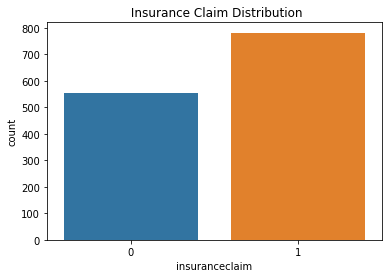

In [17]:

sns.countplot(x='insuranceclaim', data=df)
plt.title(" Insurance Claim Distribution")
plt.show()


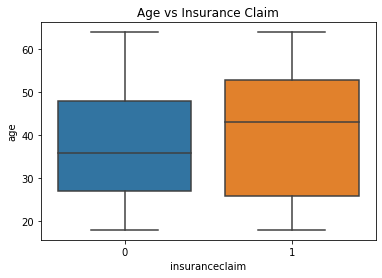

In [18]:

sns.boxplot(x='insuranceclaim', y='age', data=df)
plt.title("Age vs Insurance Claim")
plt.show()



## 6. Data Wrangling Summary

✔ Data successfully collected and organized  
✔ Feature definitions and distributions understood  
✔ Missing values and duplicates handled  
✔ Dataset ready for EDA, feature engineering, and modeling  

**Next steps:**  
- Deeper EDA  
- Feature engineering  
- Train/test split and ML modeling  
